## Import Library



In [ ]:
pip install textblob

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 8.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2e3a7809c015c222d247a4964e12ed95fb5ccb5e2944bb4e15af0ed2045baf17
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import collections
import re
import string
import itertools
from langdetect import detect
from nltk.util import ngrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
import nltk
nltk.download('stopwords')
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

import pathlib 
import glob 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, columns=np.unique(['Negative', 'Positive']), 
                     index = np.unique(['Negative', 'Positive']))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

## Connect Drive and Create data from Json file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = [json.loads(line) for line in open('/content/gdrive/MyDrive/Colab Notebooks/Data Scientist/Final Project/news_collection.json', 'r')]

In [ ]:
# Take Statement, text, label, language from Json
def get_text(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        if 'ref_source' in data[i]:
          text = data[i]['ref_source']['text']
          table.append(text)
  return table
def get_statement(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        if 'statement' in data[i]:
          statement = data[i]['statement']
          table.append(statement)
  return table
def get_label(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        if 'label' in data[i]:
          label = data[i]['label']
          table.append(label)
  return table
def get_lang(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        lang = data[i]['lang']
        table.append(lang)
  return table

def get_langs(data):                                    
  try:                                                          
    lang = detect (data)
    return lang                                   
  except:                                                       
    lang='no'                                                       
    return lang

In [ ]:
label = get_label(data)
statement = get_statement(data)
text = get_text(data)
lang = get_lang(data)

In [ ]:
table = zip(statement,text,label)
table = list(table)
df = pd.DataFrame(table, columns =['statement','text','label'])

In [ ]:
# detect language from text
df['languages'] = df['text'].apply(lambda x: get_langs(x))

In [ ]:
# create new dataframe ( only English text )
df_en = df[df['languages'] == 'en']

In [ ]:
# check number of row
df_en['label'].value_counts()

real    4408
fake    1133
Name: label, dtype: int64

## EDA

### Common Word


In [ ]:
# 1.Create variable lemmatizer, porter, lancaster
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
lancaster=LancasterStemmer()

# 2.Create funtion filter lemma and stremming
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
# Create new columns convert label to number 1: real, 0: fake
def fake_real(x):
  if x == 'fake':
    return 0
  elif x == 'real':
    return 1

In [ ]:
# Apply function fake_real
df_en['target'] = df_en['label'].apply(fake_real)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Funtion create columns stopwords_lemma_stemming
def stopwords_lemma_stemming(data):
  newscolumns = ' '.join([word for word in data.split() if word.lower() not in (stop)])
  newscolumns = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(newscolumns)])
  newscolumns = stemSentence(newscolumns)
  return newscolumns

In [ ]:
# filter stopword
df_en['text_without_stopwords'] = df_en['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# filter stopword, lemma, stremming
df_en['text_EDA'] = df_en['text'].apply(lambda x: stopwords_lemma_stemming(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Overview data again
df_en

,statement,text,label,languages,text_without_stopwords,target,text_EDA
0,Coronavirus Is a Breeding Ground for Conspirac...,This article by Daniel Jolley and Pia Lamberty...,real,en,article Daniel Jolley Pia Lamberty republished...,1,articl daniel jolley pia lamberti republish pe...
1,COVID19 and PPE Some of Us Will Die,What your doctor is reading on Medscape.com:\n...,real,en,"doctor reading Medscape.com: MARCH 20, 2020 --...",1,"doctor read medscape.com : march 20 , 2020 -- ..."
2,Worldwide Number of COVID19 Cases Over 1 Million,"April 3, 2020 - The global number of coronavir...",real,en,"April 3, 2020 - global number coronavirus case...",1,"april 3 , 2020 - global number coronaviru case..."
3,COVID19 Likely Seasonal,"March 27, 2020 - COVID-19 will likely become s...",real,en,"March 27, 2020 - COVID-19 likely become season...",1,"march 27 , 2020 - covid-19 like becom season ,..."
4,Mobile Apps for Coronavirus COVID19,The programs help you find what you need to kn...,real,en,programs help find need know virus several way...,1,program help find need know viru sever way . c...
...,...,...,...,...,...,...,...
7405,This is part of our coordinated response to th...,Commissioner @SKyriakidesEU met the Italian Mi...,real,en,Commissioner @SKyriakidesEU met Italian Minist...,1,commission @ skyriakideseu met italian minist ...
7406,We will provide up to €90 million in funding f...,We are working on all fronts to support effort...,real,en,working fronts support efforts tackle #COVID19...,1,work front support effort tackl # covid19 outb...
7407,Today we are launching the Corona response tea...,We are working around the clock to support EU ...,real,en,working around clock support EU countries stre...,1,work around clock support EU countri strengthe...
7408,This is our new dedicated webpage on #COVID19 ...,"Statement on the EU’s response, preparedness a...",real,en,"Statement EU’s response, preparedness financia...",1,"statement EU ’ s respons , prepared financi su..."


In [ ]:
# Clean punction
def clean_text(text):
    """
    Function to clean the text.
    
    Parameters:
    text: the raw text as a string value that needs to be cleaned
    
    Returns:
    cleaned_text: the cleaned text as string
    """
    # convert to lower case
    cleaned_text = text.lower()
    # remove HTML tags
    html_pattern = re.compile('-<.*?>')
    cleaned_text = re.sub(html_pattern, '', cleaned_text)
    # remove punctuations
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))
    
    return cleaned_text.strip()

In [ ]:
df_en['words_in_text'] = df_en['text_without_stopwords'].apply(lambda x: x.split(" "))
df_en

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,statement,text,label,languages,text_without_stopwords,target,text_EDA,words_in_text
0,Coronavirus Is a Breeding Ground for Conspirac...,This article by Daniel Jolley and Pia Lamberty...,real,en,article Daniel Jolley Pia Lamberty republished...,1,articl daniel jolley pia lamberti republish pe...,"[article, Daniel, Jolley, Pia, Lamberty, repub..."
1,COVID19 and PPE Some of Us Will Die,What your doctor is reading on Medscape.com:\n...,real,en,"doctor reading Medscape.com: MARCH 20, 2020 --...",1,"doctor read medscape.com : march 20 , 2020 -- ...","[doctor, reading, Medscape.com:, MARCH, 20,, 2..."
2,Worldwide Number of COVID19 Cases Over 1 Million,"April 3, 2020 - The global number of coronavir...",real,en,"April 3, 2020 - global number coronavirus case...",1,"april 3 , 2020 - global number coronaviru case...","[April, 3,, 2020, -, global, number, coronavir..."
3,COVID19 Likely Seasonal,"March 27, 2020 - COVID-19 will likely become s...",real,en,"March 27, 2020 - COVID-19 likely become season...",1,"march 27 , 2020 - covid-19 like becom season ,...","[March, 27,, 2020, -, COVID-19, likely, become..."
4,Mobile Apps for Coronavirus COVID19,The programs help you find what you need to kn...,real,en,programs help find need know virus several way...,1,program help find need know viru sever way . c...,"[programs, help, find, need, know, virus, seve..."
...,...,...,...,...,...,...,...,...
7405,This is part of our coordinated response to th...,Commissioner @SKyriakidesEU met the Italian Mi...,real,en,Commissioner @SKyriakidesEU met Italian Minist...,1,commission @ skyriakideseu met italian minist ...,"[Commissioner, @SKyriakidesEU, met, Italian, M..."
7406,We will provide up to €90 million in funding f...,We are working on all fronts to support effort...,real,en,working fronts support efforts tackle #COVID19...,1,work front support effort tackl # covid19 outb...,"[working, fronts, support, efforts, tackle, #C..."
7407,Today we are launching the Corona response tea...,We are working around the clock to support EU ...,real,en,working around clock support EU countries stre...,1,work around clock support EU countri strengthe...,"[working, around, clock, support, EU, countrie..."
7408,This is our new dedicated webpage on #COVID19 ...,"Statement on the EU’s response, preparedness a...",real,en,"Statement EU’s response, preparedness financia...",1,"statement EU ’ s respons , prepared financi su...","[Statement, EU’s, response,, preparedness, fin..."


In [ ]:
# Create list real label
Real = df_en[df_en['label']=='real']['words_in_text']
print("Total real label: ", len(Real))
Real_words = list(itertools.chain(*Real))
print("Total words in real :", len(Real_words))
# Create list fake label
Fake = df_en[df_en['label']=='fake']['words_in_text']
print("Total fake label: ", len(Fake))
Fake_words = list(itertools.chain(*Fake))
print("Total words in fake :", len(Fake_words))

Total real label:  4408
Total words in real : 501543
Total fake label:  1133
Total words in fake : 233539


In [ ]:
Real_words_frequency = collections.Counter(Real_words)
# top 10 most frequent words in Real reviews
print("Most common Real words:", Real_words_frequency.most_common(10))
Fake_words_frequency = collections.Counter(Fake_words)
# top 10 most frequent words in positive reviews
print("Most common Fake words:", Fake_words_frequency.most_common(10))

Most common Real words: [('COVID-19', 4114), ('people', 3532), ('may', 2431), ('health', 2200), ('virus', 1876), ('also', 1849), ('patients', 1533), ('Mayo', 1526), ('new', 1469), ('Dr.', 1371)]
Most common Fake words: [('—', 1389), ('people', 1194), ('coronavirus', 766), ('going', 718), ('would', 693), ('virus', 675), ('said', 669), ('also', 658), ('one', 636), ('like', 587)]


In [ ]:
Real_freq_words_df = pd.DataFrame(Real_words_frequency.most_common(10),
                                     columns=["Word", "Frequency"])
Real_freq_words_df

,Word,Frequency
0,COVID-19,4114
1,people,3532
2,may,2431
3,health,2200
4,virus,1876
5,also,1849
6,patients,1533
7,Mayo,1526
8,new,1469
9,Dr.,1371


In [ ]:
Fake_freq_words_df = pd.DataFrame(Fake_words_frequency.most_common(10),
                                     columns=["Word", "Frequency"])
Fake_freq_words_df

,Word,Frequency
0,—,1389
1,people,1194
2,coronavirus,766
3,going,718
4,would,693
5,virus,675
6,said,669
7,also,658
8,one,636
9,like,587


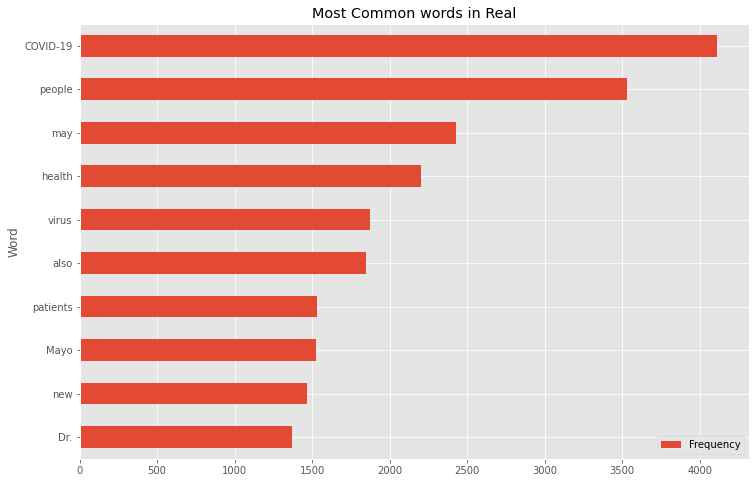

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
# plot horizontal bar plot
Real_freq_words_df.sort_values(by='Frequency').plot.barh(x="Word", y="Frequency", ax=ax)
# set the title
plt.title("Most Common words in Real")
plt.show()

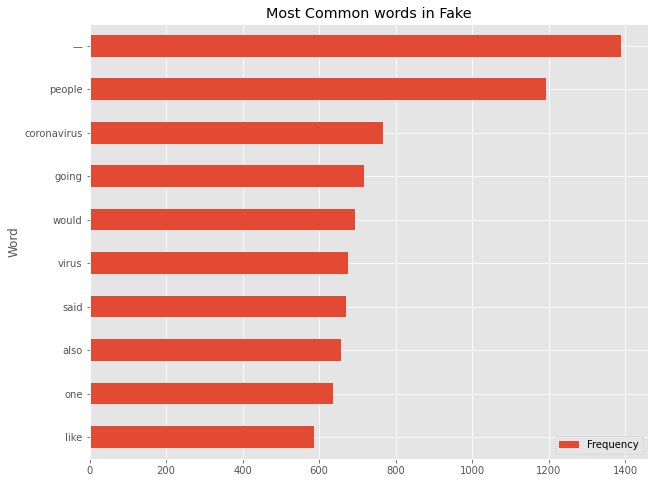

In [ ]:
# set figure size
fig, ax = plt.subplots(figsize=(10, 8))
# plot horizontal bar plot
Fake_freq_words_df.sort_values(by='Frequency').plot.barh(x="Word", y="Frequency", ax=ax)
# set the title
plt.title("Most Common words in Fake")
plt.show()

### Analyzing punctuations

In [ ]:
# create corpus punctuations
def create_corpus(target):
    corpus=[]
    
    for x in df_en[df_en['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

* First let's check in class 1

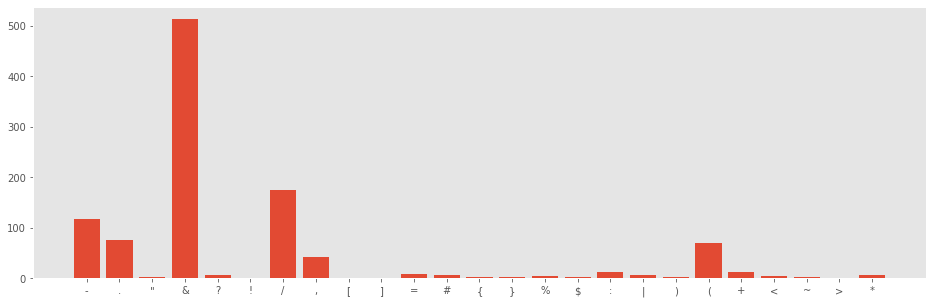

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.grid()
plt.show()

* Now, we will move on to class 0

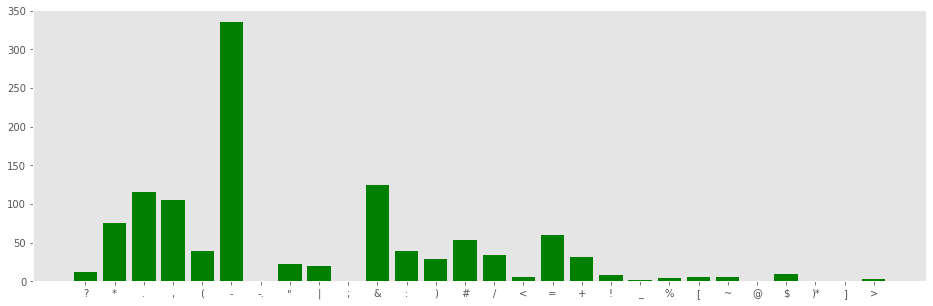

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')
plt.grid()
plt.show()

### Number word in text

In [ ]:
# Function calculator len of each row text
def length(text):    
    return len(text)

In [ ]:
# Apply create new columns length
df_en['length'] = df_en['text'].apply(length)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


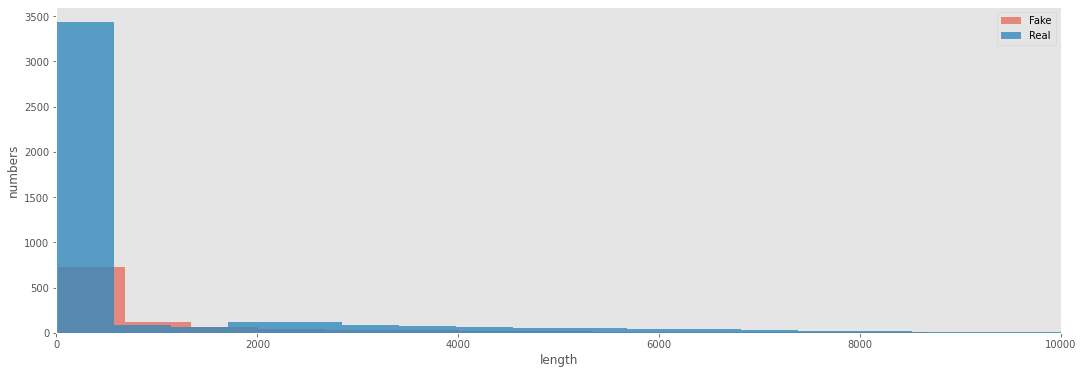

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df_en[df_en['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Fake')
plt.hist(df_en[df_en['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,10000)
plt.grid()
plt.show()

In [ ]:
# check outlier
df_en['length'].sort_values(ascending=False)

1326    100000
1488    100000
1466    100000
1521     93024
1337     92568
         ...  
6043        11
6229        11
6392        10
6135         8
6419         8
Name: length, Length: 5541, dtype: int64

*   Data have around from 500 to 1000
*   Data have max word 10000 and min is 8 word


### Common stop word in text

In [ ]:

def create_corpus(target):
    corpus=[]
    for x in df_en[df_en['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

* First we will analyze tweets with class 0.

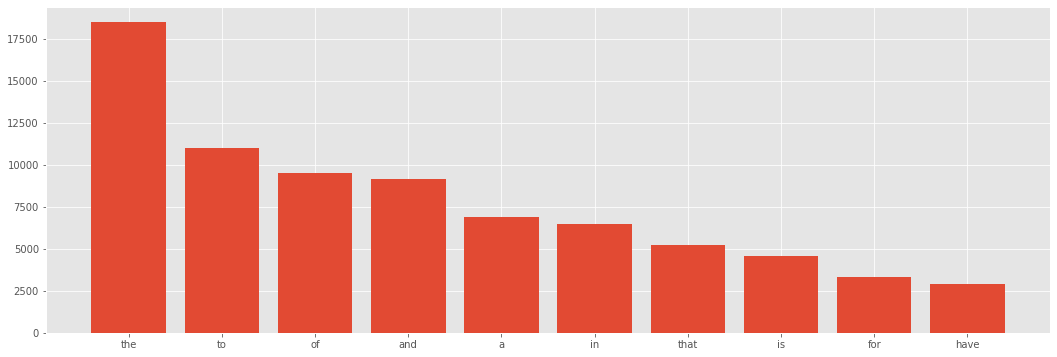

In [ ]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top_fake = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

# Visulize stopword
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top_fake)
plt.bar(x,y)
plt.show()

In [ ]:
# displaying the stopwords
np.array(stop)

array({'what', 'ma', 'his', "it's", 'themselves', 'out', 'don', 'before', 'of', 'shan', 'having', 'most', 'if', 'which', 'other', 'from', "wouldn't", 'under', 'you', "needn't", "weren't", 'nor', "you'd", "wasn't", 'just', "should've", 'doing', 'all', 'is', 'up', "hadn't", 'more', 'y', 'so', 'a', 'were', 'whom', 'couldn', "doesn't", 'about', 'but', 'for', 'above', 'doesn', 'below', "mustn't", 'haven', 'not', "don't", 'd', 'he', 'weren', 'm', 'only', 'down', "you'll", 'am', 'mustn', 'them', "you're", "hasn't", 'can', 'any', 'me', 'who', 'it', 'during', 'because', 'each', 'should', 's', 'are', 'yours', 'such', "won't", 'she', 'our', 'hers', 'further', 'and', 'no', 'through', 'do', "didn't", 'own', 'him', 'has', 're', 'aren', 'have', 'how', "haven't", 'the', 'ain', 'both', 'than', 'off', "you've", 'shouldn', "aren't", 'its', 'mightn', 'be', 'in', 'then', 'needn', 'by', 'yourself', 'herself', 'yourselves', 'same', "isn't", 'over', 'an', 'why', 'with', 'we', 'i', 'those', 'on', 'wasn', "shan

* Now, we will analyze tweets with class 1.

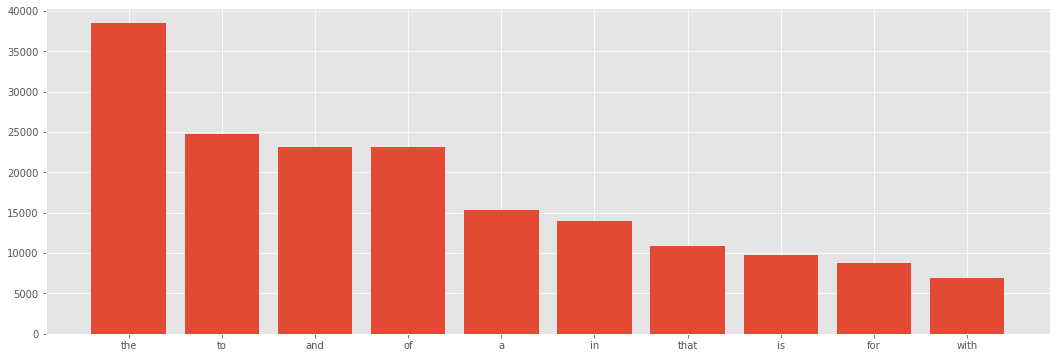

In [ ]:
corpus = create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top_real = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top_real)
plt.bar(x,y)
plt.show()

* In both of them,"the" and "to" dominates which is followed by "of" in class 0 and "and" in class 1.

## WordCloud

### Wordcloud in class 1

In [ ]:
# Create list wordcloud real
word_cloud_top_100 = []
for i in range(len(Real_words_frequency.most_common(100))):
  temp = Real_words_frequency.most_common(100)[i][0]
  word_cloud_top_100.append(temp)

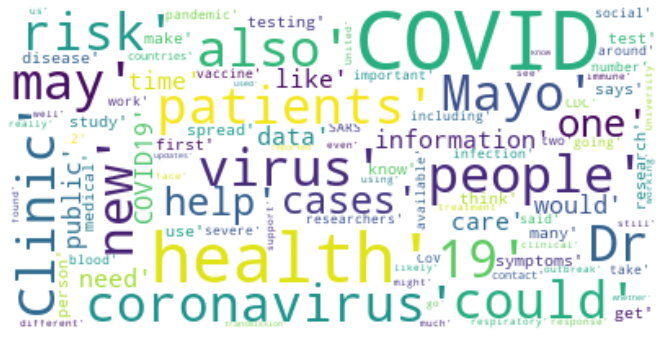

In [ ]:
# plot wordcloud
text = str(word_cloud_top_100)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Wordcloud in class 0

In [ ]:
# Create list wordcloud fake
word_cloud_bottom_100 = []
for i in range(len(Fake_words_frequency.most_common(100))):
  temp = Fake_words_frequency.most_common(100)[i][0]
  word_cloud_bottom_100.append(temp)

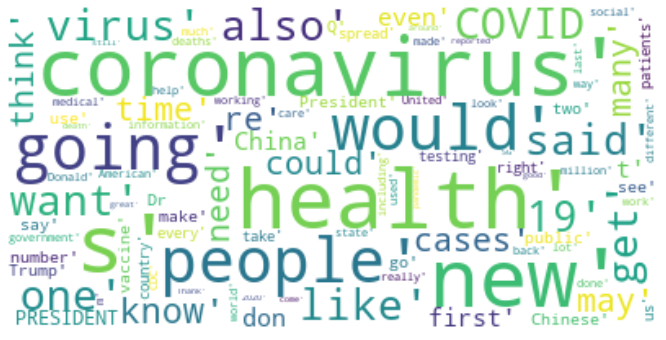

In [ ]:
# plot wordcloud
text_2 = str(word_cloud_bottom_100)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()